# DAT405 Assignment 2 - Group 2

### Francisco Boudagh - (15.5 hours)
### Jakob Engström - (15.5 hours)

### April 16, 2023


------------------

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [81]:
# Upload data
df = pd.read_csv('d2.csv')
x = np.array(df['Living_area'])
y = np.array(df['Selling_price'])

## 1. Problem a) and b)

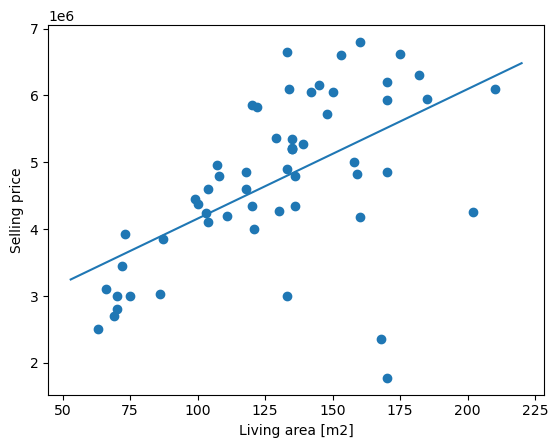

y = k * x + m
Slope, k:  19370.14
Intercept, m:  2220603.24
Regression function: price(A) = 19370.14*A + 2220603.24


In [82]:
from sklearn.linear_model import LinearRegression

# Using linear regression
model = LinearRegression()
model.fit(x[:, np.newaxis], y)
xfit = np.array([min(x)-10, max(x)+10])
yfit = model.predict(xfit[:, np.newaxis])

# Scatter plot with regression line
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlabel('Living area [m2]')
plt.ylabel('Selling price')
plt.show()

# Printing some information about the regression
k = model.coef_
m = model.intercept_
print('y = k * x + m')
print('Slope, k:  '+ str(round(k[0],2)))
print('Intercept, m:  '+ str(round(m,2)))
print('Regression function: price(A) = 19370.14*A + 2220603.24')

## 1. Problem c)

In [83]:
# List of some living areas
x = [10, 100, 150, 200, 1000]
price_estimate = (k * x + m)

print('Area [m^2] : Price [MSEK]')

for i in range (0,len(x)):
    print(str(x[i]) + ' : ' + str(round(price_estimate[i]/10**6,1)))

Area [m^2] : Price [MSEK]
10 : 2.4
100 : 4.2
150 : 5.1
200 : 6.1
1000 : 21.6


## 1. Problem d)

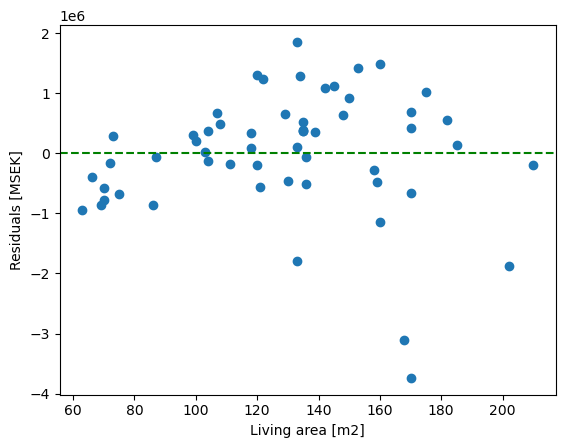

In [84]:
model = LinearRegression()
fig, ax = plt.subplots()
xValues = np.array(df['Living_area'])
yValues = np.array(df['Selling_price'])

# Fitting data
model.fit(xValues[:, np.newaxis], yValues)

# Predicting y values for x values
yPredicted = model.predict(xValues[:, np.newaxis])

# Calculating residuals
residuals = yValues - yPredicted

# Plotting  residuals
ax.scatter(xValues, residuals)
ax.axhline(y=0, color='green', linestyle='--')

ax.set_xlabel('Living area [m2]')
ax.set_ylabel('Residuals [MSEK]')

ax.label_outer()
plt.show()

## 1. Problem e)

The linear model for price estimation is good for showing that there is a clear relationship between the living area and the price. However, the price estimation model is very bad since it **only** takes into account the living area as a factor. In reality, there are many other factors that change the price of a house, such as the condition and year of construction. Another useful factor to include could be the actual inflation in the country.

This specific model is customized for Landvetter's housing market and therefore will not work well in other places with a different housing market.

A good way to improve the model is to take into account more variables, such as the condition index of the house, what type of house it is, how many bedrooms there are, etc. It might also perform better if the regression were a polynomial instead of linear since the data, just by looking at it appears to be nonlinear.

------------





## 2. Problem a)

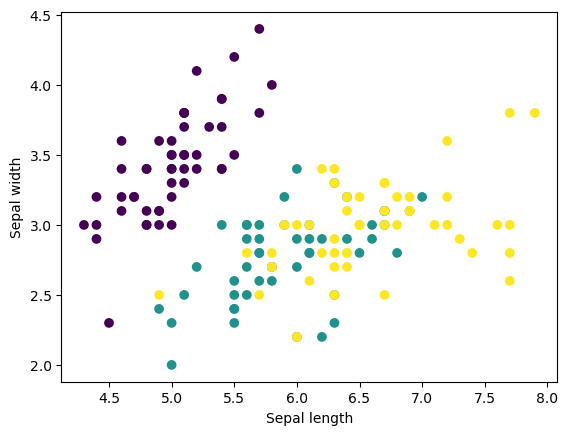

In [85]:
from sklearn.datasets import load_iris

iris = load_iris()

# Extracting two first features (length and width)
X = iris.data[:, :2]
# Ectracting species
y = iris.target

# Scatter plot 
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

We can see that (in general) the sepal length has a higher range than the width.

We can also see that Setosa species is clearly separated from the other two that overlaps.

## 2. Problem b)

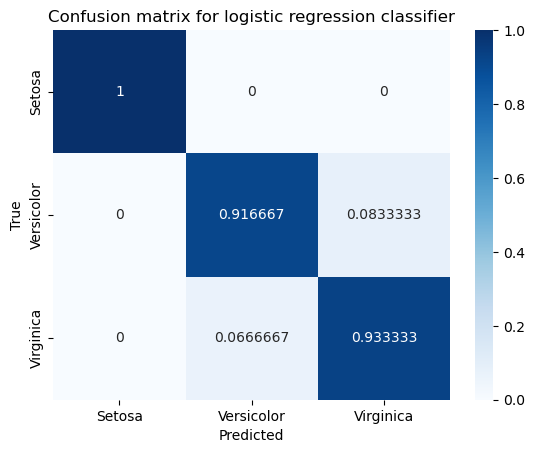

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

iris_data, iris_target = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred, normalize='true')

# Confusion matrix plot
classes = ['Setosa', 'Versicolor', 'Virginica']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix for logistic regression classifier')
plt.show()

## 2. Problem c)

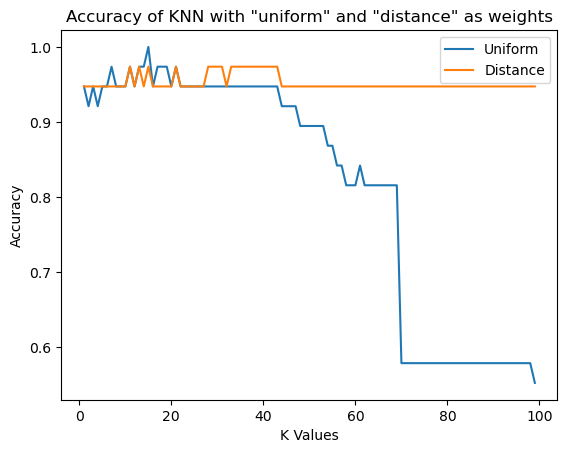

In [87]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


# Lists for accuracy scores for "uniform" and "distance" weights
acc_uniform = []
acc_distance = []

k_values=range(1,100,1)

# Different k values giving accuracy
for k in range(1,100,1):
    # KNN model with "uniform" as weight
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(X_train, y_train)
    y_pred_uniform = knn_uniform.predict(X_test)
    acc_uniform.append(accuracy_score(y_test, y_pred_uniform))
    
    # KNN model with "distance" as weight
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(X_train, y_train)
    y_pred_distance = knn_distance.predict(X_test)
    acc_distance.append(accuracy_score(y_test, y_pred_distance))

# Plot the accuracy as function of k for unifrom and distace
plt.plot(k_values, acc_uniform, label='Uniform')
plt.plot(k_values, acc_distance, label='Distance')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN with "uniform" and "distance" as weights')
plt.legend()
plt.show()

From the diagram above, we can see that the optimal value for "Uniform" is around k=4 and k=8 for "Distance".

When k grows into a large number (>60) the accuracy of KNN model for the weight "Uniform" becomes very bad, as it can bee seen in the graph above. While the accuracy for "Distance" weight remains, more or less, constant over different k values. When we choose a large k value for the "Uniform" weight, the algorithm considers a large number of neighbors, and this is not always true, it is therefore necessary to experiment with the given data to choose an optimal k value. So, in our case, choosing a high k value using "Uniform" weight, the model will underfit the data.

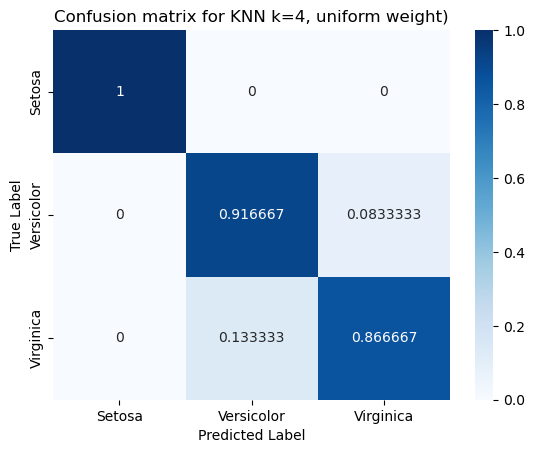

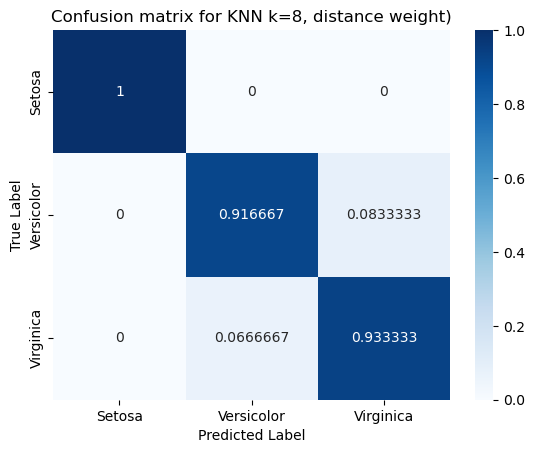

In [88]:
# Confusion matrix plot, KNN, "uniform"
knn_uniform = KNeighborsClassifier(n_neighbors=4, weights='uniform')
knn_uniform.fit(X_train, y_train)
y_pred_uniform = knn_uniform.predict(X_test)
cm_uniform = confusion_matrix(y_test, y_pred_uniform, normalize='true')

sns.heatmap(cm_uniform, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion matrix for KNN k=4, uniform weight)')
plt.show()

# Confusion matrix plot, KNN, "distance"
knn_distance = KNeighborsClassifier(n_neighbors=8, weights='distance')
knn_distance.fit(X_train, y_train)
y_pred_distance = knn_distance.predict(X_test)
cm_distance = confusion_matrix(y_test, y_pred_distance, normalize='true')

sns.heatmap(cm_distance, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion matrix for KNN k=8, distance weight)')
plt.show()

## 2. Problem d)

##### Comparison between the logistic regression classifier in (b) with the k-nearest neighbour classifier in (c).
Both the logisitc regression in (b) and k-nearest in (c) are classifying the data quite accurate. But for k-nearest in (c) one need to choose a "good" k value in order to get the model to classify accurately (it is important to evaluate the data and choose a reasonable k-value to avoid overfitting and underfitting). Setosa seems to be easy to predict, for both models, this is because it is the species that is clearly separeted from the other two, one can see this in the plot in 2.a. Versicolor seems to be harder to predict with logistic regression classifier. So in overall, the k-nearest classifier is performing a bit better in this case.